# Problem Set 2
## Replicating figures from selected papers

Name: Juan Paolo B. Ignacio 

Student Number: 2021-07695 

Date of Creation: April 13, 2025 until April 18, 2025

### Defining the global and data paths for the replication.

Folders are organized in this way:
`Econ 138 Problem Set 2`
|
|__`Brazil`
|__`

In [2]:
# Define a global file path variable
file_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2"

## #1: South Africa

Mettetal, E. (2019). Irrigation dams, water and infant mortality: Evidence from South Africa. Journal of Development Economics, 138, 17-40. Figure 2: Hydrodams in South Africa but instead of the river gradient, use the population density instead.


In [ ]:
# Define the data path variable for South Africa
data_SA_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//South Africa"

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import rasterio.mask
import numpy as np
from shapely.geometry import mapping

# Loading the local municipal boundaries of South Africa
sa_districts = gpd.read_file(
    "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//South Africa//SA_MDB_Local_Municipal_Boundary_2018//MDB_Local_Municipal_Boundary_2018.shp"
    )

# Loading the dam locations in South Africa
sa_dams = gpd.read_file(
    "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//South Africa//Dams_south_africa.xlsx"
    )

# --- Load population density raster ---
pop_density_path = "path_to/population_density.tif"
with rasterio.open(pop_density_path) as src:
    pop_data = src.read(1)
    profile = src.profile

# --- Function to compute average population density per district ---
def population_density(districts_gdf, raster_path):
    densities = []
    with rasterio.open(raster_path) as src:
        for _, row in districts_gdf.iterrows():
            geom = [mapping(row["geometry"])]
            try:
                out_image, _ = rasterio.mask.mask(src, geom, crop=True)
                data = out_image[0]
                data = data[data != src.nodata]
                avg_density = data.mean()
            except:
                avg_density = np.nan
            densities.append(avg_density)
    return pd.Series(densities)

# --- Apply function and store result ---
districts["avg_pop_density"] = average_population_density(districts, pop_density_path)

# --- Plot the map ---
fig, ax = plt.subplots(figsize=(12, 10))
districts.plot(column="avg_pop_density", cmap="YlGnBu", legend=True, ax=ax, edgecolor="gray", linewidth=0.5)
dams.plot(ax=ax, color="red", markersize=8, label="Irrigation Dams")

plt.title("Dam Locations and Population Density by District", fontsize=16)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.show()


## #2: Ethiopia

Fried, S., & Lagakos, D. (2021). Rural electrification, migration and structural transformation: Evidence from Ethiopia. Regional Science and Urban Economics, 91, 103625. Figure 4: Ethiopian Population density and ERSS Sample Villages


## #3: Vietnam

Balboni, C. (2025). In harm's way? infrastructure investments and the persistence of coastal cities. American Economic Review, 115(1), 77-116. Figure 3: Roadmap of Vietnam (not necessarily in 2010 but still replicate the road types)


In [25]:
# Define the data path variable for Vietnam
data_Vietnam_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Vietnam"

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat("C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Vietnam//RawData//Transport//2000 roads//NonInundated//d_matrix.mat")

# Check the top-level keys (variables stored)
print(mat_data.keys())

print("Available variables:", mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'd'])
Available variables: dict_keys(['__header__', '__version__', '__globals__', 'd'])


AttributeError: 'dict' object has no attribute 'shape'

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Load road shapefile ---
vietnam_roads = gpd.read_file(data_Vietnam_path, "//RawData//Transport//2000 roads//NonInundated//d_matrix.mat")

# --- Optional: Load Vietnam boundary for context ---
vietnam_map = gpd.read_file(data_Vietnam_path, "//RawData//Boundaries//hanoi_hcmc_vietnam_VN_UTM48N.shp")


# --- Make sure CRS is consistent ---
vietnam_roads = vietnam_roads.to_crs("EPSG:4326")
vietnam_map = vietnam_map.to_crs("EPSG:4326")

# --- Preview road types ---
print(vietnam_roads['road_class'].unique())  # Might be named 'type', 'class', 'highway', etc.

# --- Plot the map ---
fig, ax = plt.subplots(figsize=(12, 10))
vietnam.plot(ax=ax, color='white', edgecolor='black')

# Plot different road classes with style
styles = {
    'Class 1': {'color': 'red', 'linewidth': 2.5, 'label': 'Class 1'},
    'Class 2': {'color': 'orange', 'linewidth': 2, 'label': 'Class 2'},
    'Class 3': {'color': 'green', 'linewidth': 1.5, 'label': 'Class 3'},
    'Other': {'color': 'gray', 'linewidth': 1, 'label': 'Other'}
}

for road_type, style in styles.items():
    if road_type == 'Other':
        subset = roads[~roads['road_class'].isin(['Class 1', 'Class 2', 'Class 3'])]
    else:
        subset = roads[roads['road_class'] == road_type]
    subset.plot(ax=ax, color=style['color'], linewidth=style['linewidth'], label=style['label'])

# Final plot tweaks
plt.title("Roadmap of Vietnam by Road Type", fontsize=16)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


ValueError: 'bbox' should be a length-4 tuple.

## #4: Brazil

Morten, M., & Oliveira, J. (2024). The effects of roads on trade and migration: Evidence from a planned capital city. American Economic Journal: Applied Economics, 16(2), 389-421. Figure 1: Brazil's Capital and Main Road Infrastructure.


In [3]:
# Define the data path variable for Vietnam
data_Brazil_path = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil"

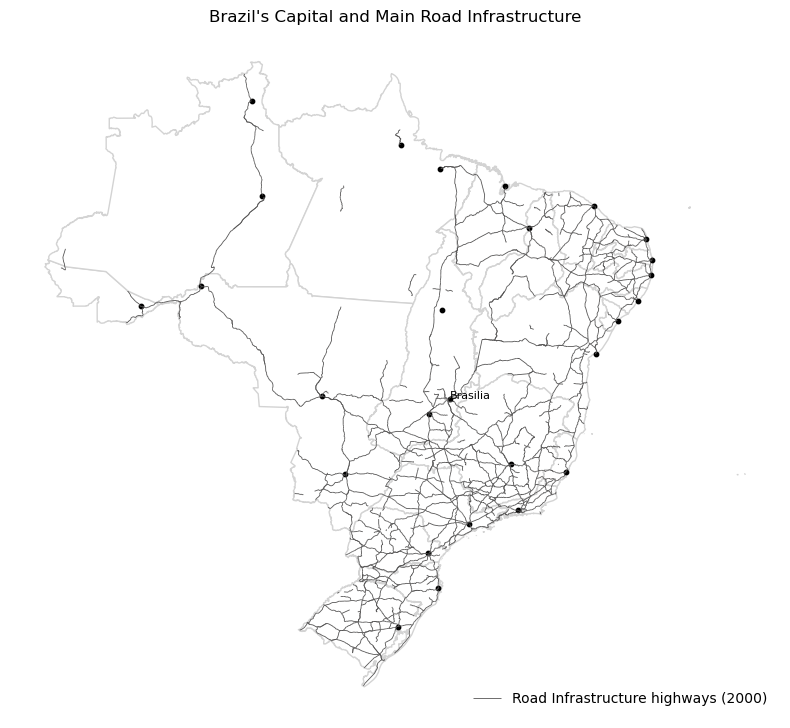

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set your data directory
secdata = "C://Users//Juan Paolo Ignacio//OneDrive//Desktop//Econ 138 Problem Set 2//Brazil//Data//GIS_data"

# Read and simplify shapefiles
def read_and_simplify(path, tolerance=0.01):
    gdf = gpd.read_file(path)
    return gdf.simplify(tolerance, preserve_topology=True)

# Load datasets
states = read_and_simplify(os.path.join(secdata, "uf1940//uf1940_prj.shp"))
highways = read_and_simplify(os.path.join(secdata, "roads//2000//highways_2000_prj.shp"))

# Read city data
capital_cities = gpd.read_file(os.path.join(secdata, "cities//brazil_capital_cities_prj.shp"))
capital_cities["X"] = capital_cities.geometry.x
capital_cities["Y"] = capital_cities.geometry.y

# --- Figure 1: Main Text ---
fig, ax = plt.subplots(figsize=(8, 8))

# Plot base layers
states.plot(ax=ax, facecolor="white", edgecolor="lightgray")


# Road infrastructure
highways.plot(ax=ax, linewidth=0.6, color="#565555", label="Road Infrastructure highways (2000)")

# Plotting the location of of Brazilian cities with dots
ax.scatter(capital_cities["X"], capital_cities["Y"], s=10, color="black")

# Only label Brasília, Brazil's Main Capital
brasilia = capital_cities[capital_cities["CITY_NAME"].str.contains("Bras", case=False, na=False)]
texts = [ax.text(row["X"], row["Y"], row["CITY_NAME"], fontsize=8) for idx, row in brasilia.iterrows()]


# Style
ax.set_axis_off()
ax.legend(loc="lower right", frameon=False)
plt.title("Brazil's Capital and Main Road Infrastructure")
plt.tight_layout()
